In [40]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import stan as ps
import seaborn as sns
import os
from scipy.stats import expon, multivariate_normal, norm

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply()

#Specify the number of chains to the number of availible cpu's.
n_chains = os.cpu_count()
n_samples = 1000
#Convert to int so Stan will not crash below.
n_warmup = int(n_samples/2)
#Specify step size.
stepS = .8

SEED = 43
rng = np.random.default_rng(SEED)

In [17]:
# define properties of our copula
b_scale = 2
θ = {"a_dist": norm(), "b_dist": expon(scale=1 / b_scale), "rho": 0.9}

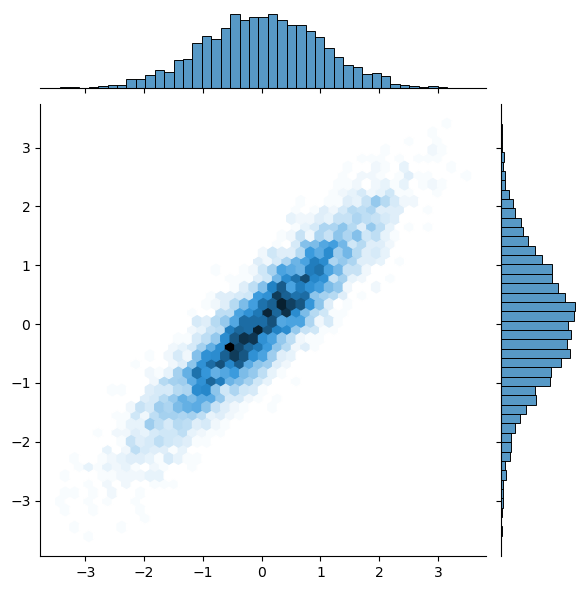

In [18]:
n_samples = 5000

# draw random samples in multivariate normal space
mu = [0, 0]
cov = [[1, θ["rho"]], [θ["rho"], 1]]
x = multivariate_normal(mu, cov).rvs(n_samples, random_state=rng)
a_norm = x[:, 0]
b_norm = x[:, 1]

sns.jointplot(x=a_norm, y=b_norm, height=6, kind="hex");

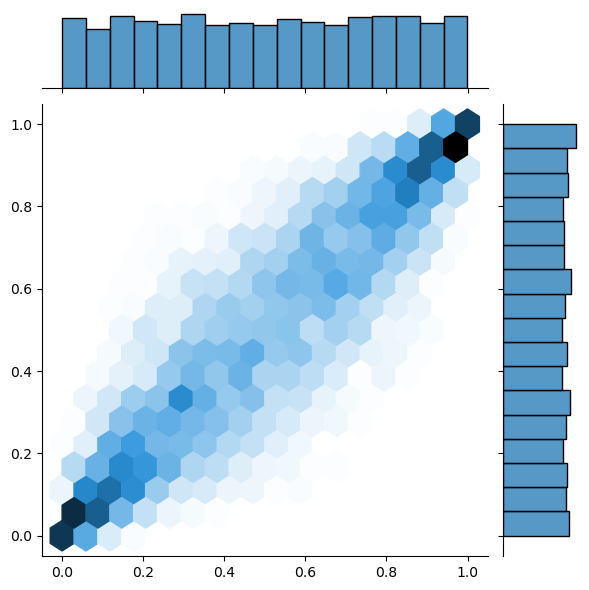

In [19]:
# make marginals uniform
a_unif = norm(loc=0, scale=1).cdf(a_norm)
b_unif = norm(loc=0, scale=1).cdf(b_norm)
sns.jointplot(x=a_unif, y=b_unif, height=6, kind="hex");

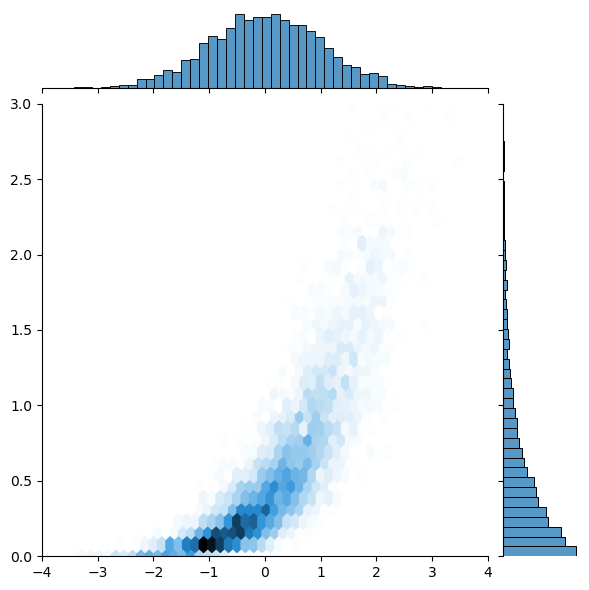

In [20]:
# transform to observation space
a = θ["a_dist"].ppf(a_unif)
b = θ["b_dist"].ppf(b_unif)
sns.jointplot(x=a, y=b, height=6, kind="hex", xlim=(-4, 4), ylim=(0, 3));

In [66]:
copula_sm = '''
data{
int N;
array[N] real a;
array[N] real b;
}
parameters{
real mu_a;
real<lower = 0> sigma_a;
real<lower = 0> sigma_b;
}
model{
// Priors for a 
mu_a ~ normal(0, 1);
sigma_a ~ exponential(0.5);
// Priors for b 
sigma_b ~ exponential(0.5);

a ~ normal(mu_a, sigma_a);
b ~ exponential(1/sigma_b);
}
generated quantities{
//real mean_a = mean(to_vector(mu_a));
}
'''

In [67]:
d = {'N': len(a),
     'a': a,
     'b': b}

In [68]:
sm = ps.build(copula_sm, data=d, random_seed=1)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.8s
Building: 

In file included from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/functor.hpp:12,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun.hpp:198,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp:2:
/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp: In function 'void stan::math::internal::combination(std::vector<int>&, const int&, const int&, const int

Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s


In file included from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/inc

Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s


/home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp: In constructor 'model_6md5xzjl_namespace::model_6md5xzjl::model_6md5xzjl(stan::io::var_context&, unsigned int, std::ostream*)':
/home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp:46:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
   46 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
In file included from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
/hom

Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s


/home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp: In instantiation of 'void model_6md5xzjl_namespace::model_6md5xzjl::transform_inits_impl(const stan::io::var_context&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; stan::require_vector_t<T_y>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]':
/home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp:361:25:   required from here
/home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp:241:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
  241 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/harrison/.cache/httpstan/4.6.1/models/6md5xzjl/model_6md5xzjl.cpp: In instantiation of 'void model_6md5xzjl_namespace::model_6md5xzjl::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std

Building: 10.9s
Building: 11.0s


/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of 'TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]':
/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from 'TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<doub

Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s


/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/err/elementwise_check.hpp: In instantiation of 'void stan::math::elementwise_check(const F&, const char*, const char*, const T&, const char*, const Indexings& ...) [with F = check_finite<Eigen::Matrix<double, 2, 1> >(const char*, const char*, const Eigen::Matrix<double, 2, 1>&)::<lambda(double)>; T = Eigen::Matrix<double, 2, 1>; Indexings = {}; stan::require_eigen_t<S>* <anonymous> = 0; std::enable_if_t<((Eigen::internal::traits<_Rhs>::Flags & Eigen::LinearAccessBit) || T::IsVectorAtCompileTime)>* <anonymous> = 0]':
/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/err/check_finite.hpp:29:20:   required from 'void stan::math::check_finite(const char*, const char*, const T_y&) [with T_y = Eigen::Matrix<double, 2, 1>]'
/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/hypergeometri

Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s


/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/err/elementwise_check.hpp: In instantiation of 'void stan::math::elementwise_check(const F&, const char*, const char*, const T&, const char*, const Indexings& ...) [with F = check_not_nan<Eigen::ArrayWrapper<Eigen::Map<const Eigen::Matrix<double, -1, 1>, 0, Eigen::Stride<0, 0> > > >(const char*, const char*, const Eigen::ArrayWrapper<Eigen::Map<const Eigen::Matrix<double, -1, 1>, 0, Eigen::Stride<0, 0> > >&)::<lambda(double)>; T = Eigen::ArrayWrapper<Eigen::Map<const Eigen::Matrix<double, -1, 1>, 0, Eigen::Stride<0, 0> > >; Indexings = {}; stan::require_eigen_t<S>* <anonymous> = 0; std::enable_if_t<((Eigen::internal::traits<_Rhs>::Flags & Eigen::LinearAccessBit) || T::IsVectorAtCompileTime)>* <anonymous> = 0]':
/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/err/check_not_nan.hpp:28:20:   required from 'void stan::math::check_not_na

Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.6s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s
Building: 19.4s
Building: 19.5s


Building: 19.6s, done.


In [70]:
fit = sm.sample(num_chains = n_chains , num_samples = n_samples, num_warmup = n_warmup, stepsize = stepS)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: exponential_lpdf: Inverse scale parameter is inf, but must be positive finite! (in '/tmp/httpstan_xtden2p9/model_6md5xzjl.stan', line 20, column 0 to column 27)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: exponential_lpdf: Inverse scale parameter is inf, but must be positive finite! (in '/tmp/httpstan_xtden2p

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_xtden2p9/model_6md5xzjl.stan', line 19, column 0 to column 26)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_xtden2p9/model_6md5xzjl.stan', line 19, column 0 to column 26)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your mode

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_xtden2p9/model_6md5xzjl.stan', line 19, column 0 to column 26)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


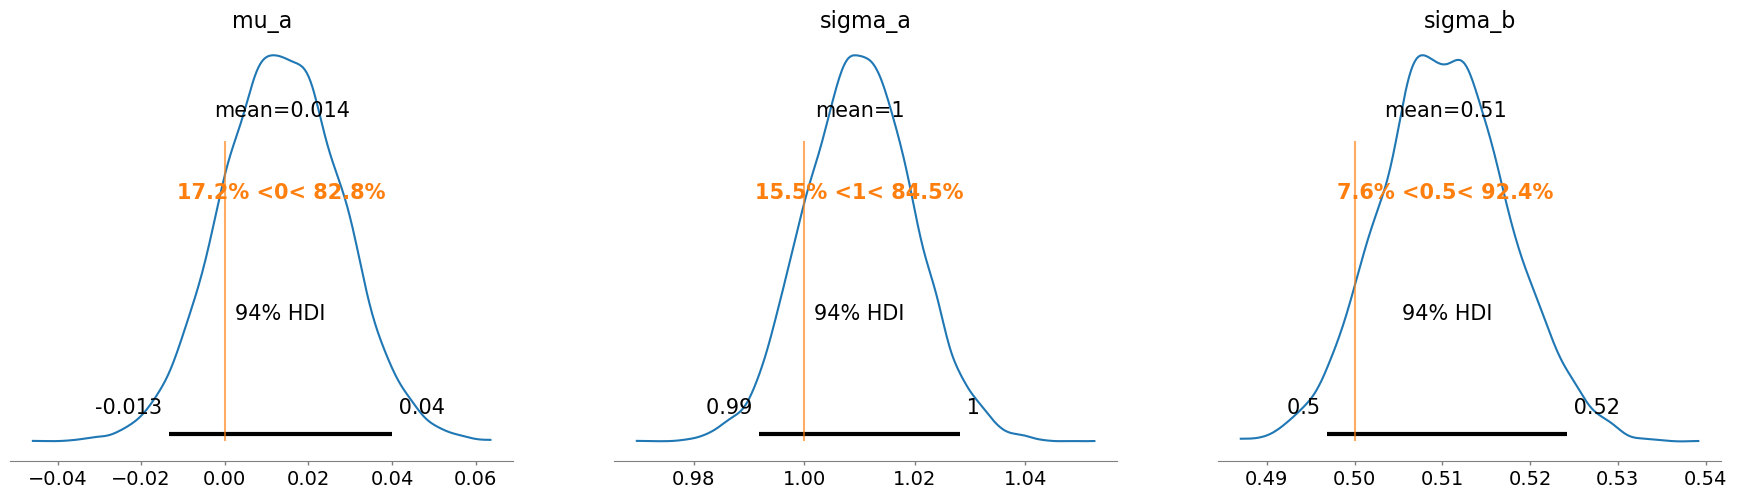

In [44]:
az.plot_posterior(
    fit, ref_val=[0, 1.0, 1 / 2.0]
);

In [46]:
idata = az.from_pystan(posterior=fit, posterior_model=sm)#
idata

Inference data with groups:
	> posterior
	> sample_stats

In [49]:
def transform_data(idata):
    # point estimates
    a_mu = idata.posterior["mu_a"].mean().item()
    a_sigma = idata.posterior["sigma_a"].mean().item()
    b_scale = idata.posterior["sigma_b"].mean().item()
    __a = pt.exp(pm.logcdf(pm.Normal.dist(mu=a_mu, sigma=a_sigma), a))
    __b = pt.exp(pm.logcdf(pm.Exponential.dist(lam=1 / b_scale), b))
    # uniform space -> multivariate normal space
    _a = pm.math.probit(__a)
    _b = pm.math.probit(__b)
    # join into an Nx2 matrix
    data = pt.math.stack([_a, _b], axis=1).eval()
    return a_mu, a_sigma, b_scale
transform_data(idata)

(0.01359806230778646, 1.009976794643101, 0.5103097470917942)

In [ ]:
mvn = '''
data{
int N;
int K;
array[N] vector[K] y;
}
parmeters{
cholesky_factor_corr[K] L_Omega;
vector<lower=0>[K] L_sigma;
}
data{

L_Sigma = diag_pre_multiply(L_sigma, L_Omega);
y ~ multi_normal_cholesky(0, L_Sigma);
}
'''